Train Shape: (8707, 18)
Test Shape: (48, 18)
Train Columns: ['label', 'Age', 'Language', 'Sex', 'Marital', 'Has_Credit', 'Field', 'Month_of_birth', 'Day_of_birth', 'Region', 'Number_of_credits', 'Linked_cards', 'INPS_mln_sum', 'INPS_yes_no', 'Score_level', 'Score_class', 'Score_point', 'Changed_phone_number']
Detected Target Column: label

=== Logistic Regression ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



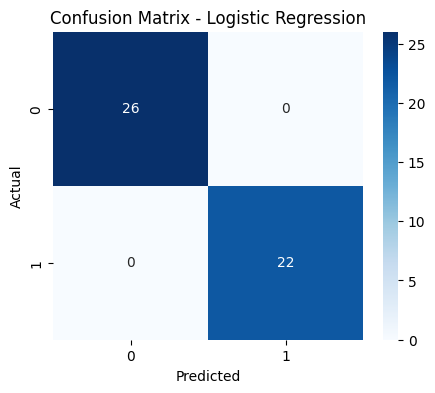


=== Decision Tree ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



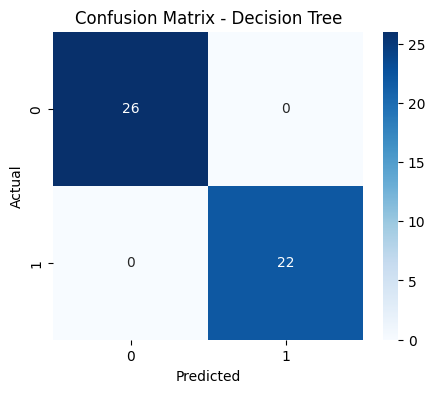


=== Random Forest ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



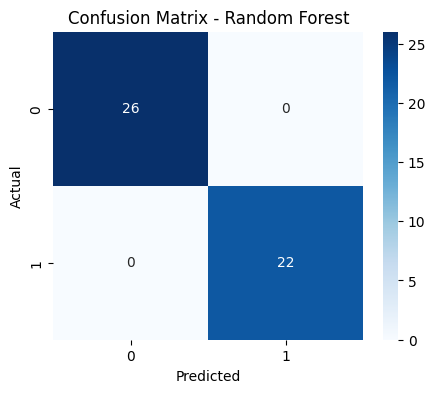

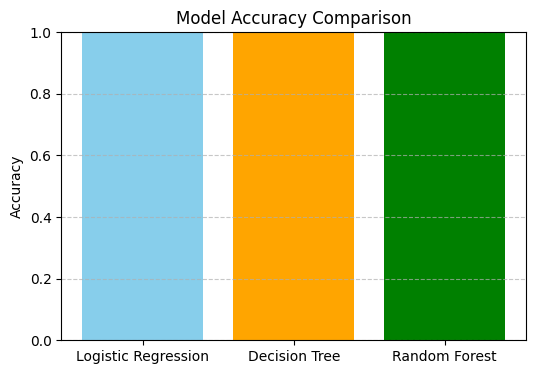

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===== 1. Paths =====
base_path = r"C:\Users\bukka\Downloads\credit_data"
train_path = os.path.join(base_path, "data_train.csv")
test_path = os.path.join(base_path, "data_test.csv")

# ===== 2. Load Data =====
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(f"Train Shape: {train_df.shape}")
print(f"Test Shape: {test_df.shape}")
print(f"Train Columns: {list(train_df.columns)}")

# ===== 3. Target Column =====
possible_targets = ["label", "target", "Target", "TARGET"]
target_column = None
for col in possible_targets:
    if col in train_df.columns:
        target_column = col
        break
if not target_column:
    raise ValueError("Target column not found. Please update 'possible_targets'.")

print(f"Detected Target Column: {target_column}")

# ===== 4. Replace placeholders with NaN =====
train_df.replace("-", np.nan, inplace=True)
test_df.replace("-", np.nan, inplace=True)

# ===== 5. Split features & target =====
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# ===== 6. Handle categorical features =====
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == "object" or X_train[col].dtype == "O":
        X_train[col] = X_train[col].fillna("Unknown")
        X_test[col] = X_test[col].fillna("Unknown")
        combined_data = pd.concat([X_train[col], X_test[col]], axis=0).astype(str)
        le = LabelEncoder()
        le.fit(combined_data)
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
        label_encoders[col] = le

# ===== 7. Fill numeric missing values =====
for col in X_train.columns:
    if np.issubdtype(X_train[col].dtype, np.number):
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)

# ===== 8. Feature Scaling =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== 9. Train & Evaluate Models =====
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

accuracies = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc

    print(f"\n=== {model_name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ===== 10. Accuracy Comparison Graph =====
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
